In [1]:

import pickle
import sys
import numpy as np
#import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from rotations import Quaternion, skew_symmetric
sys.path.append('./data')

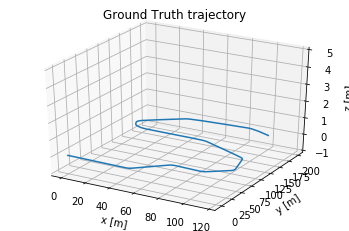

In [2]:

#### 1. Data ###################################################################################

################################################################################################
# This is where you will load the data from the pickle files. For parts 1 and 2, you will use
# p1_data.pkl. For part 3, you will use p3_data.pkl.
################################################################################################
with open('data/p1_data.pkl', 'rb') as file:
    data = pickle.load(file)

################################################################################################
# Each element of the data dictionary is stored as an item from the data dictionary, which we
# will store in local variables, described by the following:
#   gt: Data object containing ground truth. with the following fields:
#     a: Acceleration of the vehicle, in the inertial frame
#     v: Velocity of the vehicle, in the inertial frame
#     p: Position of the vehicle, in the inertial frame
#     alpha: Rotational acceleration of the vehicle, in the inertial frame
#     w: Rotational velocity of the vehicle, in the inertial frame
#     r: Rotational position of the vehicle, in Euler (XYZ) angles in the inertial frame
#     _t: Timestamp in ms.
#   imu_f: StampedData object with the imu specific force data (given in vehicle frame).
#     data: The actual data
#     t: Timestamps in ms.
#   imu_w: StampedData object with the imu rotational velocity (given in the vehicle frame).
#     data: The actual data
#     t: Timestamps in ms.
#   gnss: StampedData object with the GNSS data.
#     data: The actual data
#     t: Timestamps in ms.
#   lidar: StampedData object with the LIDAR data (positions only).
#     data: The actual data
#     t: Timestamps in ms.
################################################################################################
gt = data['gt']
imu_f = data['imu_f']
imu_w = data['imu_w']
gnss = data['gnss']
lidar = data['lidar']

################################################################################################
# Let's plot the ground truth trajectory to see what it looks like. When you're testing your
# code later, feel free to comment this out.
################################################################################################
gt_fig = plt.figure()
ax = gt_fig.add_subplot(111, projection='3d')
ax.plot(gt.p[:,0], gt.p[:,1], gt.p[:,2])
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_title('Ground Truth trajectory')
ax.set_zlim(-1, 5)
plt.show()

In [3]:
Quaternion(*q_est[0]).to_mat().dot(np.array(imu_f.data[0].T) - g)

NameError: name 'q_est' is not defined

In [9]:
print(gnss.data[0])
print(lidar.data[0])

[-0.0226153  -0.13252318 -0.04939175]
[3.14003823 0.46175372 2.1349602 ]


In [11]:
print(imu_f.t[0:50])
print(lidar.t)

[2.055 2.06  2.065 2.07  2.075 2.08  2.085 2.09  2.095 2.1   2.105 2.11
 2.115 2.12  2.125 2.13  2.135 2.14  2.145 2.15  2.155 2.16  2.165 2.17
 2.175 2.18  2.185 2.19  2.195 2.2   2.205 2.21  2.215 2.22  2.225 2.23
 2.235 2.24  2.245 2.25  2.255 2.26  2.265 2.27  2.275 2.28  2.285 2.29
 2.295 2.3  ]
[ 2.055  2.16   2.265  2.37   2.475  2.58   2.685  2.79   2.895  3.
  3.105  3.21   3.315  3.42   3.525  3.63   3.735  3.84   3.945  4.05
  4.15   4.255  4.355  4.46   4.565  4.67   4.775  4.88   4.98   5.085
  5.19   5.295  5.4    5.505  5.605  5.71   5.815  5.92   6.025  6.13
  6.23   6.335  6.44   6.545  6.65   6.755  6.855  6.96   7.065  7.17
  7.275  7.38   7.48   7.585  7.69   7.795  7.9    8.005  8.11   8.21
  8.315  8.42   8.525  8.63   8.735  8.835  8.94   9.045  9.15   9.255
  9.36   9.46   9.565  9.67   9.775  9.88   9.985 10.085 10.19  10.295
 10.4   10.505 10.61  10.71  10.815 10.92  11.025 11.13  11.235 11.335
 11.44  11.545 11.65  11.755 11.86  11.96  12.065 12.17  12.275 12

0.004999999999999893
0.009999999999999787
0.01499999999999968
0.020000000000000018
0.02499999999999991
0.029999999999999805
0.0349999999999997
0.040000000000000036
0.04499999999999993
0.04999999999999982
0.054999999999999716
0.06000000000000005
0.06499999999999995
0.06999999999999984
0.07499999999999973
0.07999999999999963
0.08499999999999996
0.08999999999999986
0.09499999999999975
0.09999999999999964
0.10499999999999998
0.10999999999999988
0.11499999999999977
0.11999999999999966
0.125
0.1299999999999999
0.1349999999999998
0.13999999999999968
0.14500000000000002
0.1499999999999999
0.1549999999999998
0.1599999999999997
0.16500000000000004
0.16999999999999993
0.17499999999999982
0.17999999999999972
0.18500000000000005
0.18999999999999995
0.19499999999999984
0.19999999999999973
0.20499999999999963
0.20999999999999996
0.21499999999999986
0.21999999999999975
0.22499999999999964
0.22999999999999998
0.23499999999999988
0.23999999999999977
0.24499999999999966
0.25
0.2549999999999999
0.25999999

3.6249999999999996
3.6299999999999994
3.6350000000000002
3.64
3.645
3.65
3.655
3.6599999999999997
3.6649999999999996
3.6699999999999995
3.6750000000000003
3.68
3.685
3.69
3.695
3.6999999999999997
3.7049999999999996
3.7099999999999995
3.7149999999999994
3.72
3.725
3.73
3.735
3.7399999999999998
3.7449999999999997
3.7499999999999996
3.7549999999999994
3.7600000000000002
3.765
3.77
3.775
3.78
3.7849999999999997
3.7899999999999996
3.7949999999999995
3.8000000000000003
3.805
3.81
3.815
3.82
3.8249999999999997
3.8299999999999996
3.8349999999999995
3.8399999999999994
3.845
3.85
3.855
3.86
3.8649999999999998
3.8699999999999997
3.8749999999999996
3.8799999999999994
3.8850000000000002
3.89
3.895
3.9
3.905
3.9099999999999997
3.9149999999999996
3.9199999999999995
3.9250000000000003
3.93
3.935
3.94
3.945
3.9499999999999997
3.9549999999999996
3.9599999999999995
3.9649999999999994
3.97
3.975
3.98
3.985
3.9899999999999998
3.9949999999999997
3.9999999999999996
4.004999999999999
4.01
4.015000000000001
4.

8.09
8.095
8.1
8.105
8.11
8.115
8.120000000000001
8.125
8.13
8.135
8.14
8.145
8.15
8.155000000000001
8.16
8.165000000000001
8.17
8.175
8.18
8.185
8.19
8.195
8.200000000000001
8.205
8.21
8.215
8.22
8.225
8.23
8.235
8.24
8.245000000000001
8.25
8.255
8.26
8.265
8.27
8.275
8.280000000000001
8.285
8.290000000000001
8.295
8.3
8.305
8.31
8.315
8.32
8.325000000000001
8.33
8.335
8.34
8.345
8.35
8.355
8.36
8.365
8.370000000000001
8.375
8.38
8.385
8.39
8.395
8.4
8.405000000000001
8.41
8.415000000000001
8.42
8.425
8.43
8.435
8.44
8.445
8.450000000000001
8.455
8.46
8.465
8.47
8.475
8.48
8.485
8.49
8.495000000000001
8.5
8.505
8.51
8.515
8.52
8.525
8.530000000000001
8.535
8.540000000000001
8.545
8.55
8.555
8.56
8.565
8.57
8.575000000000001
8.58
8.585
8.59
8.595
8.6
8.605
8.61
8.615
8.620000000000001
8.625
8.63
8.635
8.64
8.645
8.65
8.655000000000001
8.66
8.665000000000001
8.67
8.675
8.68
8.685
8.69
8.695
8.700000000000001
8.705
8.71
8.715
8.72
8.725
8.73
8.735
8.74
8.745000000000001
8.75
8.755
8.76
8

14.465
14.469999999999999
14.475000000000001
14.48
14.485
14.490000000000002
14.495000000000001
14.5
14.504999999999999
14.510000000000002
14.515
14.52
14.524999999999999
14.530000000000001
14.535
14.54
14.545000000000002
14.55
14.555
14.559999999999999
14.565000000000001
14.57
14.575
14.580000000000002
14.585
14.59
14.594999999999999
14.600000000000001
14.605
14.61
14.615000000000002
14.620000000000001
14.625
14.629999999999999
14.635000000000002
14.64
14.645
14.649999999999999
14.655000000000001
14.66
14.665
14.670000000000002
14.675
14.68
14.684999999999999
14.690000000000001
14.695
14.7
14.705000000000002
14.71
14.715
14.719999999999999
14.725000000000001
14.73
14.735
14.740000000000002
14.745000000000001
14.75
14.754999999999999
14.760000000000002
14.765
14.77
14.774999999999999
14.780000000000001
14.785
14.79
14.795000000000002
14.8
14.805
14.809999999999999
14.815000000000001
14.82
14.825
14.830000000000002
14.835
14.84
14.844999999999999
14.850000000000001
14.855
14.86
14.86500

19.76
19.765
19.77
19.775
19.78
19.785
19.79
19.795
19.8
19.805
19.81
19.815
19.82
19.825
19.830000000000002
19.835
19.84
19.845
19.85
19.855
19.86
19.865000000000002
19.87
19.875
19.88
19.885
19.89
19.895
19.9
19.905
19.91
19.915
19.92
19.925
19.93
19.935
19.94
19.945
19.95
19.955000000000002
19.96
19.965
19.97
19.975
19.98
19.985
19.990000000000002
19.995
20.0
20.005
20.01
20.015
20.02
20.025
20.03
20.035
20.04
20.045
20.05
20.055
20.06
20.065
20.07
20.075
20.080000000000002
20.085
20.09
20.095
20.1
20.105
20.11
20.115000000000002
20.12
20.125
20.13
20.135
20.14
20.145
20.15
20.155
20.16
20.165
20.17
20.175
20.18
20.185
20.19
20.195
20.2
20.205000000000002
20.21
20.215
20.22
20.225
20.23
20.235
20.240000000000002
20.245
20.25
20.255
20.26
20.265
20.27
20.275
20.28
20.285
20.29
20.295
20.3
20.305
20.31
20.315
20.32
20.325
20.330000000000002
20.335
20.34
20.345
20.35
20.355
20.36
20.365000000000002
20.37
20.375
20.38
20.385
20.39
20.395
20.4
20.405
20.41
20.415
20.42
20.425
20.43
20.43

25.895
25.9
25.905
25.91
25.915
25.92
25.925
25.93
25.935
25.94
25.945
25.95
25.955000000000002
25.96
25.965
25.97
25.975
25.98
25.985
25.990000000000002
25.995
26.0
26.005
26.01
26.015
26.02
26.025
26.03
26.035
26.04
26.045
26.05
26.055
26.06
26.065
26.07
26.075
26.080000000000002
26.085
26.09
26.095
26.1
26.105
26.11
26.115000000000002
26.12
26.125
26.13
26.135
26.14
26.145
26.15
26.155
26.16
26.165
26.17
26.175
26.18
26.185
26.19
26.195
26.2
26.205000000000002
26.21
26.215
26.22
26.225
26.23
26.235
26.240000000000002
26.245
26.25
26.255
26.26
26.265
26.27
26.275
26.28
26.285
26.29
26.295
26.3
26.305
26.31
26.315
26.32
26.325
26.330000000000002
26.335
26.34
26.345
26.35
26.355
26.36
26.365000000000002
26.37
26.375
26.38
26.385
26.39
26.395
26.4
26.405
26.41
26.415
26.42
26.425
26.43
26.435
26.44
26.445
26.45
26.455000000000002
26.46
26.465
26.47
26.475
26.48
26.485
26.490000000000002
26.495
26.5
26.505
26.51
26.515
26.52
26.525
26.53
26.535
26.54
26.545
26.55
26.555
26.56
26.565
26.5

31.895000000000003
31.9
31.905
31.910000000000004
31.915
31.92
31.924999999999997
31.93
31.935000000000002
31.939999999999998
31.945
31.950000000000003
31.955
31.96
31.965000000000003
31.97
31.975
31.979999999999997
31.985
31.990000000000002
31.994999999999997
32.0
32.005
32.01
32.015
32.02
32.025
32.03
32.035000000000004
32.04
32.045
32.05
32.055
32.06
32.065
32.07
32.075
32.08
32.085
32.09
32.095
32.1
32.105
32.11
32.115
32.12
32.125
32.13
32.135
32.14
32.145
32.15
32.155
32.160000000000004
32.165
32.17
32.175
32.18
32.185
32.19
32.195
32.2
32.205
32.21
32.215
32.22
32.225
32.23
32.235
32.24
32.245
32.25
32.255
32.26
32.265
32.27
32.275
32.28
32.285000000000004
32.29
32.295
32.3
32.305
32.31
32.315
32.32
32.325
32.33
32.335
32.34
32.345
32.35
32.355
32.36
32.365
32.37
32.375
32.38
32.385
32.39
32.395
32.4
32.405
32.410000000000004
32.415
32.42
32.425
32.43
32.435
32.44
32.445
32.45
32.455
32.46
32.465
32.47
32.475
32.48
32.485
32.49
32.495
32.5
32.505
32.51
32.515
32.52
32.525
32.53


38.715
38.72
38.725
38.73
38.735
38.74
38.745
38.75
38.755
38.76
38.765
38.77
38.775
38.78
38.785000000000004
38.79
38.795
38.8
38.805
38.81
38.815
38.82
38.825
38.83
38.835
38.84
38.845
38.85
38.855
38.86
38.865
38.87
38.875
38.88
38.885
38.89
38.895
38.9
38.905
38.910000000000004
38.915
38.92
38.925
38.93
38.935
38.94
38.945
38.95
38.955
38.96
38.965
38.97
38.975
38.98
38.985
38.99
38.995
39.0
39.005
39.01
39.015
39.02
39.025
39.03
39.035000000000004
39.04
39.045
39.05
39.055
39.06
39.065
39.07
39.075
39.08
39.085
39.09
39.095
39.1
39.105
39.11
39.115
39.12
39.125
39.13
39.135
39.14
39.145
39.15
39.155
39.160000000000004
39.165
39.17
39.175
39.18
39.185
39.19
39.195
39.2
39.205
39.21
39.215
39.22
39.225
39.23
39.235
39.24
39.245
39.25
39.255
39.26
39.265
39.27
39.275
39.28
39.285000000000004
39.29
39.295
39.3
39.305
39.31
39.315
39.32
39.325
39.33
39.335
39.34
39.345
39.35
39.355
39.36
39.365
39.37
39.375
39.38
39.385
39.39
39.395
39.4
39.405
39.410000000000004
39.415
39.42
39.425
39

44.82
44.825
44.83
44.835
44.84
44.845
44.85
44.855
44.86
44.865
44.87
44.875
44.88
44.885
44.89
44.895
44.9
44.905
44.910000000000004
44.915
44.92
44.925
44.93
44.935
44.94
44.945
44.95
44.955
44.96
44.965
44.97
44.975
44.98
44.985
44.99
44.995
45.0
45.005
45.01
45.015
45.02
45.025
45.03
45.035000000000004
45.04
45.045
45.05
45.055
45.06
45.065
45.07
45.075
45.08
45.085
45.09
45.095
45.1
45.105
45.11
45.115
45.12
45.125
45.13
45.135
45.14
45.145
45.15
45.155
45.160000000000004
45.165
45.17
45.175
45.18
45.185
45.19
45.195
45.2
45.205
45.21
45.215
45.22
45.225
45.23
45.235
45.24
45.245
45.25
45.255
45.26
45.265
45.27
45.275
45.28
45.285000000000004
45.29
45.295
45.3
45.305
45.31
45.315
45.32
45.325
45.33
45.335
45.34
45.345
45.35
45.355
45.36
45.365
45.37
45.375
45.38
45.385
45.39
45.395
45.4
45.405
45.410000000000004
45.415
45.42
45.425
45.43
45.435
45.44
45.445
45.45
45.455
45.46
45.465
45.47
45.475
45.48
45.485
45.49
45.495
45.5
45.505
45.51
45.515
45.52
45.525
45.53
45.535000000000

51.12
51.125
51.13
51.135
51.14
51.145
51.15
51.155
51.160000000000004
51.165
51.17
51.175
51.18
51.185
51.19
51.195
51.2
51.205
51.21
51.215
51.22
51.225
51.23
51.235
51.24
51.245
51.25
51.255
51.26
51.265
51.27
51.275
51.28
51.285000000000004
51.29
51.295
51.3
51.305
51.31
51.315
51.32
51.325
51.33
51.335
51.34
51.345
51.35
51.355
51.36
51.365
51.37
51.375
51.38
51.385
51.39
51.395
51.4
51.405
51.410000000000004
51.415
51.42
51.425
51.43
51.435
51.44
51.445
51.45
51.455
51.46
51.465
51.47
51.475
51.48
51.485
51.49
51.495
51.5
51.505
51.51
51.515
51.52
51.525
51.53
51.535000000000004
51.54
51.545
51.55
51.555
51.56
51.565
51.57
51.575
51.58
51.585
51.59
51.595
51.6
51.605
51.61
51.615
51.62
51.625
51.63
51.635
51.64
51.645
51.65
51.655
51.660000000000004
51.665
51.67
51.675
51.68
51.685
51.69
51.695
51.7
51.705
51.71
51.715
51.72
51.725
51.73
51.735
51.74
51.745
51.75
51.755
51.76
51.765
51.77
51.775
51.78
51.785000000000004
51.79
51.795
51.8
51.805
51.81
51.815
51.82
51.825
51.83
51.

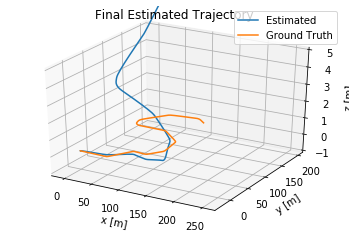

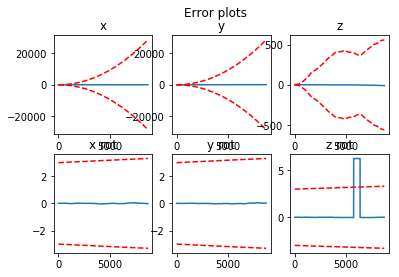

In [14]:
################################################################################################
# Remember that our LIDAR data is actually just a set of positions estimated from a separate
# scan-matching system, so we can just insert it into our solver as another position
# measurement, just as we do for GNSS. However, the LIDAR frame is not the same as the frame
# shared by the IMU and the GNSS. To remedy this, we transform the LIDAR data to the IMU frame
# using our known extrinsic calibration rotation matrix C_li and translation vector t_li_i.
#
# THIS IS THE CODE YOU WILL MODIFY FOR PART 2 OF THE ASSIGNMENT.
################################################################################################
# This is the correct calibration rotation matrix, corresponding to an euler rotation of 0.05, 0.05, .1.
C_li = np.array([
    [ 0.99376, -0.09722,  0.05466],
    [ 0.09971,  0.99401, -0.04475],
    [-0.04998,  0.04992,  0.9975 ]
])

# This is an incorrect calibration rotation matrix, corresponding to a rotation of 0.05, 0.05, 0.05
# C_li = np.array([
#     [ 0.9975 , -0.04742,  0.05235],
#     [ 0.04992,  0.99763, -0.04742],
#     [-0.04998,  0.04992,  0.9975 ]
# ])

t_li_i = np.array([0.5, 0.1, 0.5])

lidar.data = (C_li @ lidar.data.T).T + t_li_i


#### 2. Constants ##############################################################################

################################################################################################
# Now that our data is set up, we can start getting things ready for our solver. One of the
# most important aspects of a filter is setting the estimated sensor variances correctly.
# We set the values here.
################################################################################################
var_imu_f = 0.1
var_imu_w = 1.0
var_gnss = 0.01
var_lidar = 0.25

################################################################################################
# We can also set up some constants that won't change for any iteration of our solver.
################################################################################################
g = np.array([0, 0, -9.81])  # gravity
l_jac = np.zeros([9, 6])
l_jac[3:, :] = np.eye(6)  # motion model noise jacobian
h_jac = np.zeros([3, 9])
h_jac[:, :3] = np.eye(3)  # measurement model jacobian


#### 3. Initial Values #########################################################################

################################################################################################
# Let's set up some initial values for our ES-EKF solver.
################################################################################################
p_est = np.zeros([imu_f.data.shape[0], 3])  # position estimates
v_est = np.zeros([imu_f.data.shape[0], 3])  # velocity estimates
q_est = np.zeros([imu_f.data.shape[0], 4])  # orientation estimates as quaternions
p_cov = np.zeros([imu_f.data.shape[0], 9, 9])  # covariance matrices at each timestep

# Set initial values
p_est[0] = gt.p[0]
v_est[0] = gt.v[0]
q_est[0] = Quaternion(euler=gt.r[0]).to_numpy()
p_cov[0] = np.eye(9)  # covariance of estimate
gnss_i = 0
lidar_i = 0


#### 4. Measurement Update #####################################################################

################################################################################################
# Since we'll need a measurement update for both the GNSS and the LIDAR data, let's make
# a function for it.
################################################################################################
def measurement_update(sensor_var, p_cov_check, y_k, p_check, v_check, q_check):
    # 3.1 Compute Kalman Gain
    R = sensor_var * np.eye(3)
    K = p_cov.dot(h_jac.T).dot(np.linalg.inv(h_jac.dot(p_cov).dot(h_jac.T) + R))
    # 3.2 Compute error state
    delta_x = K.dot(y_k - p_check)
    # 3.3 Correct predicted state
    p_check = 
    # 3.4 Compute corrected covariance

    return p_check, v_check, q_check, p_cov_check


#### 5. Main Filter Loop #######################################################################

################################################################################################
# Now that everything is set up, we can start taking in the sensor data and creating estimates
# for our state in a loop.
################################################################################################
for k in range(1, imu_f.data.shape[0]):  # start at 1 b/c we have initial prediction from gt
    delta_t = imu_f.t[k] - imu_f.t[k - 1]
    # 1. Update state with IMU inputs
    C_ns = Quaternion(*q_est[k-1]).to_mat()
    
    p_est[k] = p_est[k-1] + delta_t * v_est[k-1] + (delta_t**2 / 2) * (C_ns.dot(imu_f.data[k-1].T) - g)
    
    v_est[k] = v_est[k-1] + delta_t * (C_ns.dot(imu_f.data[k-1].T) - g)
    
    omega_q = Quaternion(axis_angle=imu_w.data[k-1]*delta_t)
    
    q_est[k] = omega_q.quat_mult(Quaternion(*q_est[k-1]))
    # 1.1 Linearize Motion Model
    F = np.eye(9)
    F[0:3, 3:6] = delta_t * np.eye(3)
    F[3:6, 6:9] = -skew_symmetric(C_ns.dot(imu_f.data[k-1].T)) * delta_t
    Q = np.eye(6)
    Q[0:3, 0:3] = (var_imu_f) * np.eye(3) 
    Q[3:6, 3:6] = (var_imu_w) * np.eye(3) 
    Q = (delta_t ** 2) * Q
    # 2. Propagate uncertainty
    p_cov[k] = F.dot(p_cov[k-1]).dot(F.T) + l_jac.dot(Q).dot(l_jac.T)
    # 3. Check availability of GNSS and LIDAR measurements
    curr_lidar_idx = 0
    curr_gnss_idx = 0
    
    #========= GNSS UPDATE =========================
    gnss_time_diff = gnss.t[curr_gnss_idx] - imu_f.t[k]
    while (gnss_time_diff < 0) and curr_gnss_idx < len(gnss.t):
        curr_gnss_idx += 1
    if curr_gnss_idx < len(lidar.t) and (lidar_time_diff <= 0.1):
        y_k = h_jac[0:3,0:3].dot(gnss.data[curr_gnss_idx].T) + np.eye(3) * var_gnss
        #measurement_update(var_lidar, p_cov[k], y_k, p_check=p_est[k], v_check=v_est[k], q_check=q_est[k])
        curr_gnss_idx += 1
    
    #======== LIDAR UPDATE ===================================
    # check if we can find any gnss update after the motion happen
    lidar_time_diff = lidar.t[curr_lidar_idx] - imu_f.t[k]
    while (lidar_time_diff < 0) and curr_lidar_idx < len(lidar.t):
        curr_lidar_idx += 1
    if curr_lidar_idx < len(lidar.t) and (lidar_time_diff <= 0.1):
        y_k = h_jac[0:3,0:3].dot(lidar.data[curr_lidar_idx].T) + np.eye(3) * var_lidar
        measurement_update(var_lidar, p_cov[k], y_k, p_check=p_est[k], v_check=v_est[k], q_check=q_est[k])
        curr_lidar_idx += 1


#### 6. Results and Analysis ###################################################################

################################################################################################
# Now that we have state estimates for all of our sensor data, let's plot the results. This plot
# will show the ground truth and the estimated trajectories on the same plot. Notice that the
# estimated trajectory continues past the ground truth. This is because we will be evaluating
# your estimated poses from the part of the trajectory where you don't have ground truth!
################################################################################################
est_traj_fig = plt.figure()
ax = est_traj_fig.add_subplot(111, projection='3d')
ax.plot(p_est[:,0], p_est[:,1], p_est[:,2], label='Estimated')
ax.plot(gt.p[:,0], gt.p[:,1], gt.p[:,2], label='Ground Truth')
ax.set_xlabel('x [m]')
ax.set_ylabel('y [m]')
ax.set_zlabel('z [m]')
ax.set_title('Final Estimated Trajectory')
ax.legend()
ax.set_zlim(-1, 5)
plt.show()

################################################################################################
# We can also plot the error for each of the 6 DOF, with estimates for our uncertainty
# included. The error estimates are in blue, and the uncertainty bounds are red and dashed.
# The uncertainty bounds are +/- 3 standard deviations based on our uncertainty.
################################################################################################
error_fig, ax = plt.subplots(2, 3)
error_fig.suptitle('Error plots')
num_gt = gt.p.shape[0]
p_est_euler = []

# Convert estimated quaternions to euler angles
for q in q_est:
    p_est_euler.append(Quaternion(*q).to_euler())
p_est_euler = np.array(p_est_euler)

# Get uncertainty estimates from P matrix
p_cov_diag_std = np.sqrt(np.diagonal(p_cov, axis1=1, axis2=2))

titles = ['x', 'y', 'z', 'x rot', 'y rot', 'z rot']
for i in range(3):
    ax[0, i].plot(range(num_gt), gt.p[:, i] - p_est[:num_gt, i])
    ax[0, i].plot(range(num_gt), 3 * p_cov_diag_std[:num_gt, i], 'r--')
    ax[0, i].plot(range(num_gt), -3 * p_cov_diag_std[:num_gt, i], 'r--')
    ax[0, i].set_title(titles[i])

for i in range(3):
    ax[1, i].plot(range(num_gt), gt.r[:, i] - p_est_euler[:num_gt, i])
    ax[1, i].plot(range(num_gt), 3 * p_cov_diag_std[:num_gt, i+6], 'r--')
    ax[1, i].plot(range(num_gt), -3 * p_cov_diag_std[:num_gt, i+6], 'r--')
    ax[1, i].set_title(titles[i+3])
plt.show()


#### 7. Submission #############################################################################


In [ ]:

################################################################################################
# Now we can prepare your results for submission to the Coursera platform. Uncomment the
# corresponding lines to prepare a file that will save your position estimates in a format
# that corresponds to what we're expecting on Coursera.
################################################################################################

# Pt. 1 submission
p1_indices = [9000, 9400, 9800, 10200, 10600]
p1_str = ''
for val in p1_indices:
    for i in range(3):
        p1_str += '%.3f ' % (p_est[val, i])
with open('pt1_submission.txt', 'w') as file:
    file.write(p1_str)

# Pt. 2 submission
# p2_indices = [9000, 9400, 9800, 10200, 10600]
# p2_str = ''
# for val in p2_indices:
#     for i in range(3):
#         p2_str += '%.3f ' % (p_est[val, i])
# with open('pt2_submission.txt', 'w') as file:
#     file.write(p2_str)

# Pt. 3 submission
# p3_indices = [6800, 7600, 8400, 9200, 10000]
# p3_str = ''
# for val in p3_indices:
#     for i in range(3):
#         p3_str += '%.3f ' % (p_est[val, i])
# with open('pt3_submission.txt', 'w') as file:
#     file.write(p3_str)